In [1]:
from astropy.table import Table, Column
from astropy.time import Time
import astropy.units as u
import bottleneck as bn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.pos_diff import radio_cat_diff_calc

fresol = read_sou("../data/gcrf-a1u/gcrf-a1u.sou")
fixsol = read_sou("../data/gcrf-a1u-fix/gcrf-a1u-fix.sou")

# Calculate the positional difference
soldif = radio_cat_diff_calc(fixsol, fixsol, sou_name="iers_name")

In [3]:
soldif

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,ra_err_2,dec,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,mas,deg,mas,mas,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0000+212,0.5375181283825543,0.8432,0.8584622722030908,0.8306248464583333,0.5375181283825543,21.495697054361113,0.8432,0.8584622722030908,0.0,0.0,0.7601654271800108,1.1924648757929937,-0.2157399960656328,0.0,0.0,0.0,0.0
0000-160,0.43264556773419655,0.5818,0.5833936798100832,0.8636007637916667,0.43264556773419655,-15.784848251666666,0.5818,0.5833936798100832,0.0,0.0,0.6118532295903083,0.8227894505886667,-0.033729567635239245,0.0,0.0,0.0,0.0
0000-197,0.4455185210755425,0.59,0.5903060129141541,0.8278127417916668,0.4455185210755425,-19.45620942488889,0.59,0.5903060129141541,0.0,0.0,0.6300583347934359,0.834386001800126,-0.014719931936335926,0.0,0.0,0.0,0.0
0000-199,0.4341193019054731,0.5554,0.556092866035773,0.8164559942083334,0.4341193019054731,-19.69733336763889,0.5554,0.556092866035773,0.0,0.0,0.6139374044426603,0.785454212542017,-0.01928878882226398,0.0,0.0,0.0,0.0
0001+459,0.49293478448212924,0.5261,0.5346443825331338,1.0671979996666665,0.49293478448212924,46.25499234736111,0.5261,0.5346443825331338,0.0,0.0,0.6971150575800859,0.7440177551644853,-0.03941861449763933,0.0,0.0,0.0,0.0
0001+478,0.564256435352481,0.6169,0.6271887669801287,0.9418393932916667,0.564256435352481,48.11781585422222,0.6169,0.6271887669801287,0.0,0.0,0.7979791035317763,0.8724283466279623,-0.0619599835044723,0.0,0.0,0.0,0.0
0001-120,0.4169728323936722,0.529,0.5296223851270476,1.0204792259583333,0.4169728323936722,-11.816217914555557,0.529,0.5296223851270476,0.0,0.0,0.5896886347122546,0.7481189744953672,-0.016763975753555198,0.0,0.0,0.0,0.0
0002+051,0.4628344649757347,0.5742,0.5742340690920914,1.3342310570833333,0.4628344649757347,5.403001229222222,0.5742,0.5742340690920914,0.0,0.0,0.6545467775023792,0.8120414275146313,-0.004252152796625071,0.0,0.0,0.0,0.0


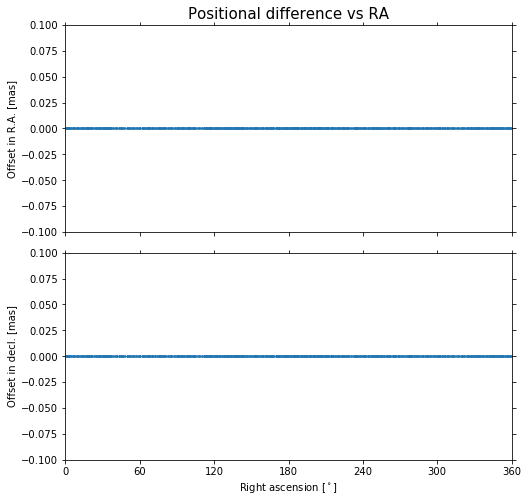

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["ra"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["ra"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Right ascension [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(0, 361, 60))

ax0.set_xlim([0, 360])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("Positional difference vs RA", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

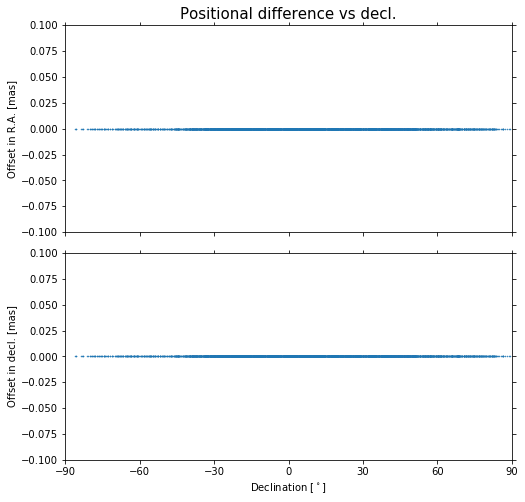

In [5]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax0.plot(soldif["dec"], soldif["dra"], ".", ms=1)
ax1.plot(soldif["dec"], soldif["ddec"], ".", ms=1)

ax0.set_ylabel("Offset in R.A. [mas]")

ax1.set_xlabel("Declination [$^\circ$]")
ax1.set_ylabel("Offset in decl. [mas]")

ax1.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.1, 0.1])
ax1.set_ylim([-0.1, 0.1])

ax0.set_title("Positional difference vs decl.", fontsize=15)

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.1)

In [6]:
# My modules
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting

# icrf2-ga-19 - icrf3-ga-19
# Transform columns into np.array
dra1 = np.array(soldif["dra"])
ddec1 = np.array(soldif["ddec"])
dra_err1 = np.array(soldif["dra_err"])
ddec_err1 = np.array(soldif["ddec_err"])
ra_rad1 = np.array(soldif["ra"].to(u.radian))
dec_rad1 = np.array(soldif["dec"].to(u.radian))
dra_ddec_cov1 = np.array(soldif["dra_ddec_cov"])

# Transformation parameters
# l_max = 2
par1, sig1, _, _, _, _ = vsh_deg02_fitting(
    dra1, ddec1, ra_rad1, dec_rad1, dra_err1, ddec_err1,
#     cov=dra_ddec_cov1, elim_flag="None")
         elim_flag="None")

# mas -> uas
par1 = par1 * 1.e3
sig1 = sig1 * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "                 Rotation [uas]                  "
      "                 Glide [uas]               \n"
      "             x             y             z"
      "             x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f"
      "        %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra1.size,
       par1[3], sig1[3], par1[4], sig1[4], par1[5], sig1[5],
       par1[0], sig1[0], par1[1], sig1[1], par1[2], sig1[2],))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])

print("Positional difference")
t_quad1 = Table([quad_names, par1[6:], sig1[6:]],
                names=["Quadrupolar term", "Estimate", "Error"])
t_quad1["Estimate"].format = "%5.0f"
t_quad1["Error"].format = "%5.0f"
print(t_quad1)

Estimates (  4356 sources)
--------------------------------------------------------------------------------------------
                 Rotation [uas]                                   Glide [uas]               
             x             y             z             x             y             z
--------------------------------------------------------------------------------------------
          +0 +/-   0    +0 +/-   0    +0 +/-   0          +0 +/-   0    +0 +/-   0    +0 +/-   0
--------------------------------------------------------------------------------------------

Positional difference
Quadrupolar term Estimate Error
---------------- -------- -----
            ER22        0     0
            EI22        0     0
            ER21        0     0
            EI21        0     0
             E20        0     0
            MR22        0     0
            MI22        0     0
            MR21        0     0
            MI21        0     0
             M20        0     0


In [7]:
from my_progs.vlbi.read_eop import read_eob
from my_progs.vlbi.comp_eop import calc_eop_offset

freeob = read_eob("../data/gcrf-a1u/gcrf-a1u.eob")
fixeob = read_eob("../data/gcrf-a1u-fix/gcrf-a1u-fix.eob")

eoboft = calc_eop_offset(freeob, fixeob, "../logs/gcrf-a1u_minus-fix_offset.dat")

# Create a Time object for epochs of EOP
eoboft.sort("epoch_pmr")

# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")

nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

There are 6633 and 6633 points in series 1 and series 2, respectively,between which 6633 are common.
Save the EOP offset series in ../logs/gcrf-a1u_minus-fix_offset.dat


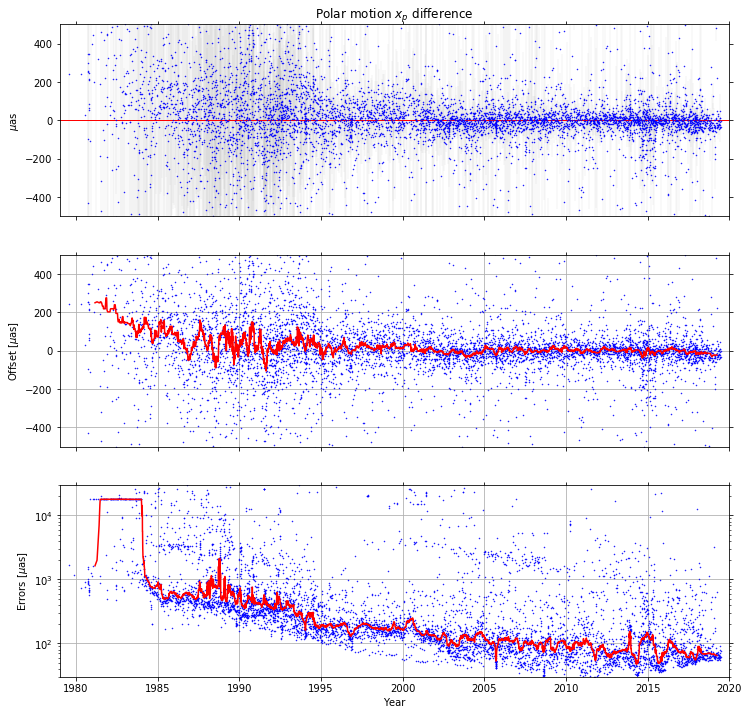

In [24]:
# Polar motion xp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dxp"],
            yerr = eoboft["dxp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dxp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dxpmed = bn.move_median(eoboft["dxp"], window=50)
ax1.plot(epomed, dxpmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dxp_err"], "b.", ms = 1)
dxperrmed = bn.move_median(eoboft["dxp_err"], window=50)
ax2.plot(epomed, dxperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
# ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
ax2.set_ylim([30, 30000])

# Titles and Labels
ax0.set_title("Polar motion $x_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

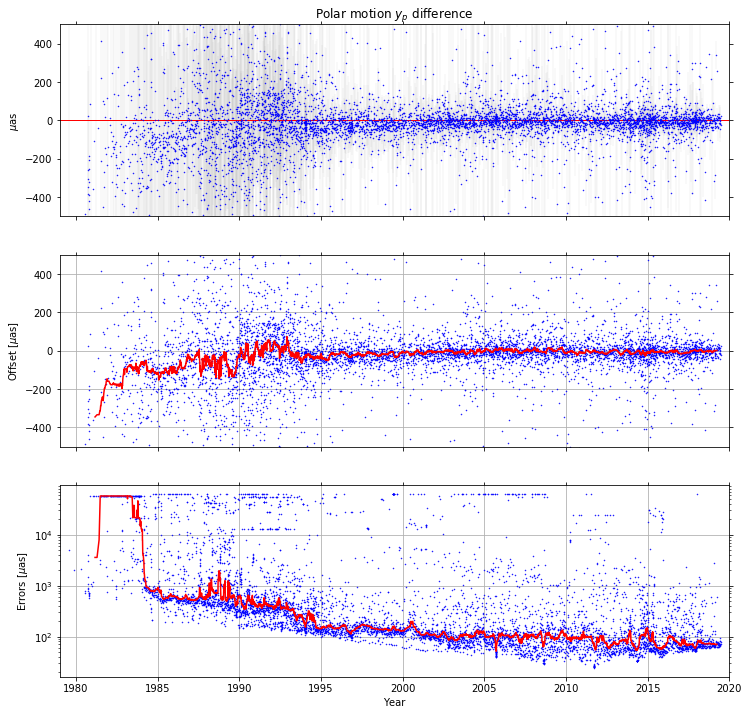

In [25]:
# Polar motion yp
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dyp"],
            yerr = eoboft["dyp_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dyp"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dypmed = bn.move_median(eoboft["dyp"], window=50)
ax1.plot(epomed, dypmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dyp_err"], "b.", ms = 1)
dyperrmed = bn.move_median(eoboft["dyp_err"], window=50)
ax2.plot(epomed, dyperrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -500, 500])
ax1.set_ylim([-500, 500])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("Polar motion $y_p$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

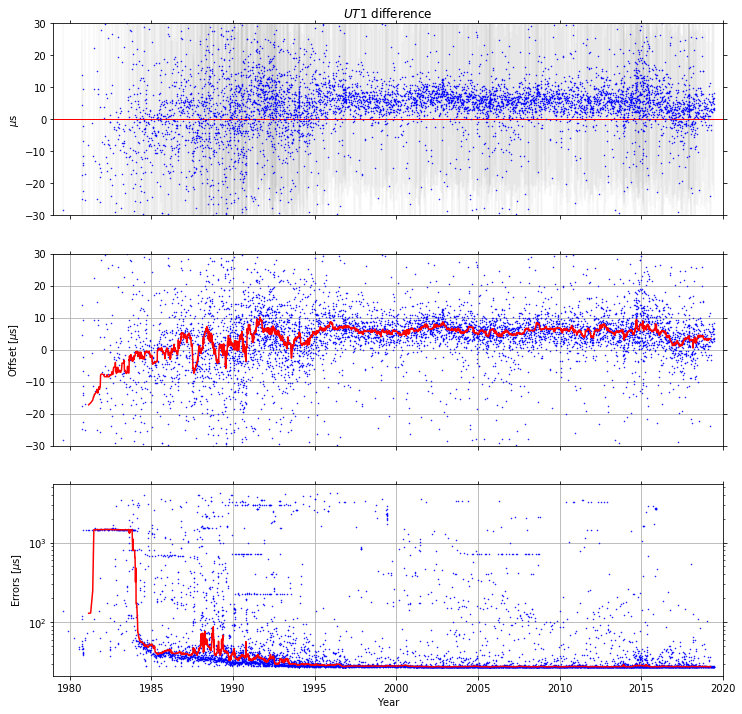

In [26]:
# UT1
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear,
            eoboft["dut"],
            yerr = eoboft["dut_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(pmrEpoch.jyear, eoboft["dut"], "b.", ms = 1)
epomed = bn.move_median(pmrEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["dut"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(pmrEpoch.jyear, eoboft["dut_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["dut_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, -30, 30])
ax1.set_ylim([-30, 30])
# ax2.set_ylim([30, 40000])

# Titles and Labels
ax0.set_title("$UT1$ difference")
ax0.set_ylabel("$\mu$s")
ax1.set_ylabel("Offset [$\mu$s]")
ax2.set_ylabel("Errors [$\mu$s]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

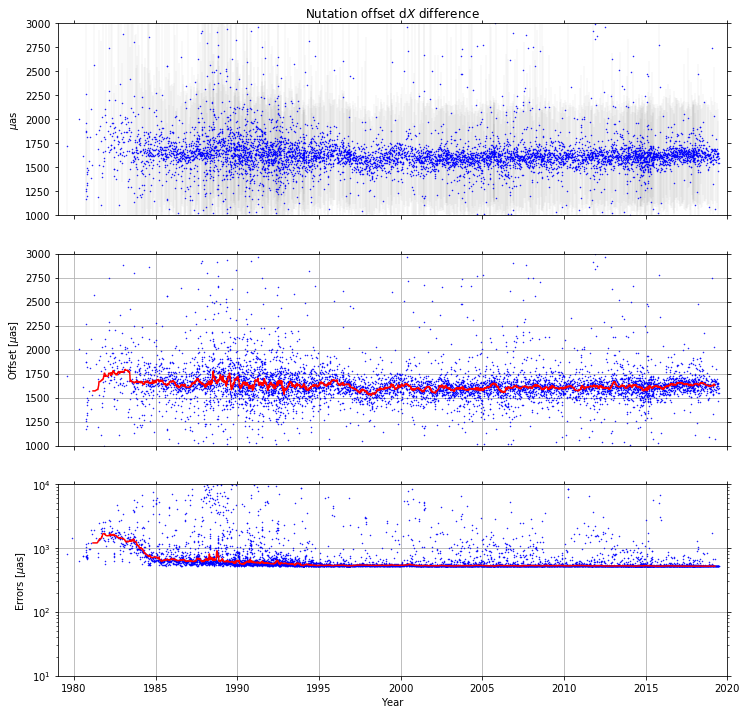

In [35]:
# Nutation offset dX
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddX"],
            yerr = eoboft["ddX_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.05,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddX"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddX"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddX_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddX_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, 1000, 3000])
ax1.set_ylim([1000, 3000])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$X$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

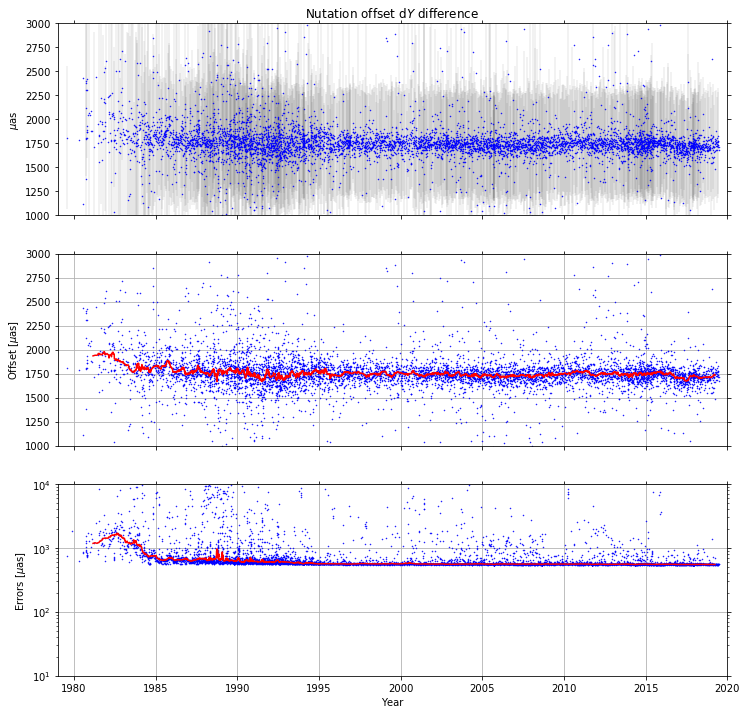

In [39]:
# Nutation offset dY
fig, (ax0, ax1, ax2)=plt.subplots(figsize = (12, 12), sharex = True, nrows=3)

# Error bar plot
ax0.errorbar(nutEpoch.jyear,
            eoboft["ddY"],
            yerr = eoboft["ddY_err"],
            fmt = "b.",
            ms = 1,
            elinewidth = 0.1,
            ecolor = "k",
            errorevery=5)

# Offset
ax1.plot(nutEpoch.jyear, eoboft["ddY"], "b.", ms = 1)
epomed = bn.move_median(nutEpoch.jyear, window=50)
dutmed = bn.move_median(eoboft["ddY"], window=50)
ax1.plot(epomed, dutmed, "r")


# Formal error
ax2.plot(nutEpoch.jyear, eoboft["ddY_err"], "b.", ms = 1)
duterrmed = bn.move_median(eoboft["ddY_err"], window=50)
ax2.plot(epomed, duterrmed, "r")


# Add a horizontal line
x=np.arange(1979, 2021, 0.5)
y0=np.zeros_like(x)
ax0.plot(x, y0, "r", lw = 1)
ax1.plot(x, y0, "r", lw = 1)

# Add a fitted line
# x0 = np.arange(1979, 2021, 1)
# y0 = x0 * 0.2 - 403
# ax.plot(x0, y0, "r", lw=2)

ax2.set_yscale("log")

# Limits
ax0.axis([1979, 2020, 1000, 3000])
ax1.set_ylim([1000, 3000])
ax2.set_ylim([10, 10000])

# Titles and Labels
ax0.set_title("Nutation offset d$Y$ difference")
ax0.set_ylabel("$\mu$as")
ax1.set_ylabel("Offset [$\mu$as]")
ax2.set_ylabel("Errors [$\mu$as]")
ax2.set_xlabel("Year")

#Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

# Add minor ticks
# ax0.xaxis.set_minor_locator(MultipleLocator(1))
# ax1.yaxis.set_minor_locator(MultipleLocator(10))

# Add grid
# ax0.grid()
ax1.grid()
ax2.grid()

## Difference in the station position and velocity

No significant difference and global sysmatics was found.

In [13]:
from my_progs.vlbi.read_trf import read_trf
from my_progs.vlbi.comp_trf import calc_trf_offset

# Station position and velocity
trf1 = read_trf("../data/gcrf-a1u/gcrf-a1u")
trf2 = read_trf("../data/gcrf-a1u-fix/gcrf-a1u-fix")

# Calculate the station position differences
trfoft = calc_trf_offset(trf1,  trf2)
trfoft

There are 188 and 188 stations in two sets, respectively, between which 188 are common.


station,xp,yp,zp,dxp,dxp_err,dyp,dyp_err,dzp,dzp_err,dxp_dyp_cov,dxp_dzp_cov,dyp_dzp_cov,xv,yv,zv,dxv,dxv_err,dyv,dyv_err,dzv,dzv_err,dxv_dyv_cov,dxv_dzv_cov,dyv_dzv_cov
,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr,0.001 m / yr
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
AGGO,2765116662.03,-4449233665.52,-3626420645.46,1.5,98.04630547858497,-3.969999313354492,120.32859509277085,18.579999923706055,100.7285199434599,-9419.903765283001,-7285.07046992,9893.043680636998,2.92,-13.67,8.45,-0.08000000000000007,10.683030328516343,0.0,13.151796721360926,-2.119999999999999,11.067022951092131,-112.52796706800001,-87.921235512,119.31834035
AIRA,-3530219644.68,4118797501.99,3344015635.4,0.039999961853027344,1.768760300323365,-0.06999969482421875,1.867873925081669,-0.4100003242492676,1.6960106131743395,-3.057866604,-2.6190793119999993,2.8102213979999995,-25.09,-6.78,-16.02,-0.21000000000000085,0.4144031853159432,0.3700000000000001,0.3854257386319705,0.379999999999999,0.41512046444375633,-0.13226343899999998,-0.12103844199999997,0.12777623200000002
ALGOPARK,918034534.99,-4346132316.84,4561971216.21,-0.16999995708465576,0.37124789561693144,0.2700004577636719,0.7928335260317894,0.4499998092651367,0.8473452661105743,-0.12997322,0.109057085,-0.539895252,-16.11,-3.8,4.0,-0.010000000000001563,0.06929646455628166,0.029999999999999805,0.08203657720797473,0.009999999999999787,0.10890362712049585,-0.00042100800000000006,0.00033614,-0.002759244
AUSTINTX,-737794278.5,-5459892554.91,3202989662.05,15.980000019073486,14048.95521354912,-27.850000381469727,14131.342346150133,-23.730000019073486,14120.701096075543,198530.59572770796,-198381.09728254104,-399088.922712184,-24.48,-13.56,-36.73,0.7199999999999989,625.1120930601168,-1.1399999999999988,628.767835126766,-1.1500000000000057,628.3216507434707,393.050377464,-392.771462211,-790.1368882020001
AZORES,4552169516.65,-2186665847.97,3882780834.28,841.4500007629395,11220.919273126823,-122.09000015258789,8287.79392754055,1575.6999998092651,10583.874584205965,-35009108.15868229,51217258.189655036,-25836414.65067383,-292.22,-60.68,60.64,47.900000000000034,638.1517041096106,-6.970000000000006,471.36068285761803,89.58,601.9011277228179,-113237.67455564399,165650.396114589,-83565.56417544
BADARY,-838200986.93,3865751562.5,4987670891.29,0.2799999713897705,0.3988307911884437,-0.03000020980834961,0.6953481142564493,0.1700000762939453,0.9337676370489609,-0.028452282,-0.08952639600000001,0.42293080000000005,-27.19,0.47,-2.84,-0.04999999999999716,0.13010764773832473,-0.02999999999999997,0.09972462083156797,-0.11000000000000032,0.2057790076757102,0.001806972,0.00046754399999999997,0.0025058159999999997
BERMUDA,2307204098.67,-4874226464.04,3394338408.09,-547.420000076294,9534.251637606645,4464.14999961853,12402.7795165924,4980.259999752045,10983.711217006754,-29443571.66018316,4389298.733043462,-50592976.614936754,-244.25,-472.44,914.32,-23.720000000000027,425.52592391651064,197.41000000000003,553.6147881668263,223.60000000000002,490.2896613390905,-58656.827824732,8744.564143560001,-100805.09627664
BLKBUTTE,-2306307292.47,-4787914382.23,3515736294.02,3.0,101.89184784858895,0.4399995803833008,207.2047163025012,-5.759999752044678,147.19397337187416,20331.309977459998,-14187.976836154001,-29202.964150511998,-18.66,2.95,-6.68,0.14999999999999858,4.4392436292683914,0.04999999999999982,9.006475281707045,-0.3200000000000003,6.421261013227853,38.502606294,-26.966235163999997,-55.374830515


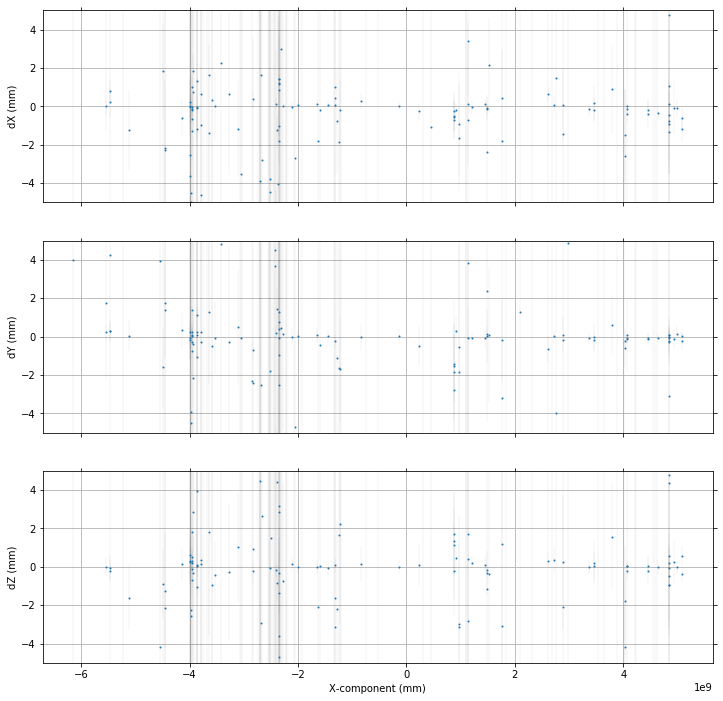

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["xp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["xp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["xp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

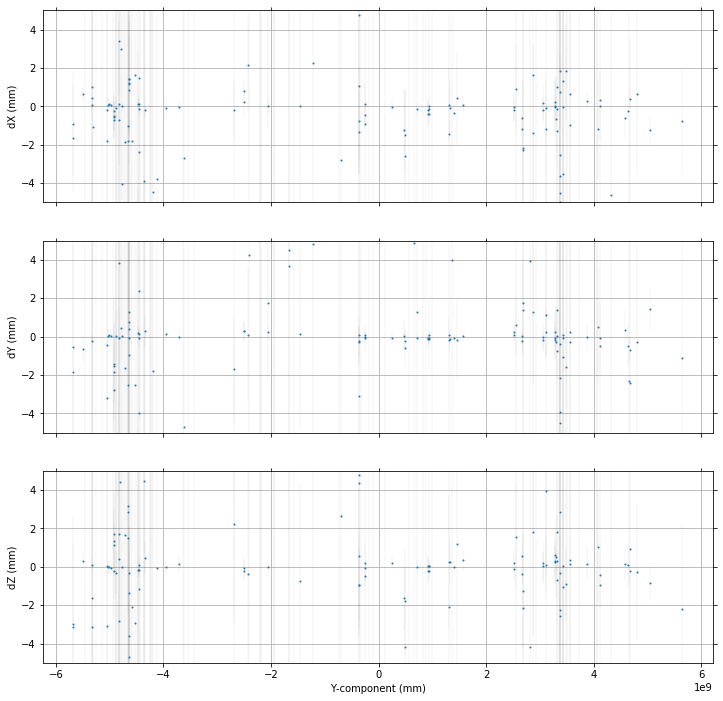

In [15]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["yp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["yp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["yp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

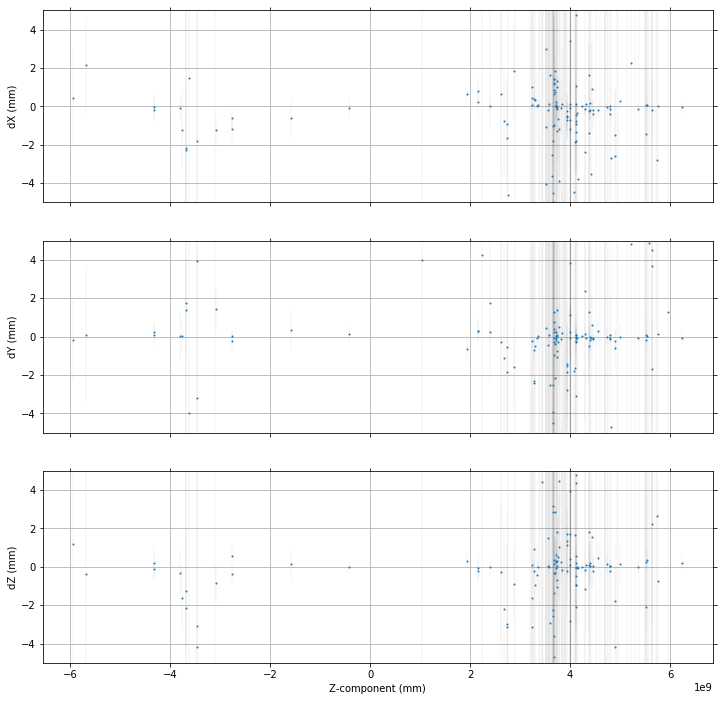

In [16]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["zp"], trfoft["dxp"], fmt=".", ms=2,
             yerr=trfoft["dxp_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["zp"], trfoft["dyp"], fmt=".", ms=2,
             yerr=trfoft["dyp_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["zp"], trfoft["dzp"], fmt=".", ms=2,
             yerr=trfoft["dzp_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm)")

ax0.set_ylabel("dX (mm)")
ax1.set_ylabel("dY (mm)")
ax2.set_ylabel("dZ (mm)")

ax0.set_ylim([-5, 5])
ax1.set_ylim([-5, 5])
ax2.set_ylim([-5, 5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [17]:
from my_progs.vlbi.helmert_trans import helmert_trans

dxp = np.array(trfoft["dxp"])
dyp = np.array(trfoft["dyp"])
dzp = np.array(trfoft["dzp"])
dxp_err = np.array(trfoft["dxp_err"])
dyp_err = np.array(trfoft["dyp_err"])
dzp_err = np.array(trfoft["dzp_err"])
xp = np.array(trfoft["xp"])
yp = np.array(trfoft["yp"])
zp = np.array(trfoft["zp"])
xy_cov = np.array(trfoft["dxp_dyp_cov"])
xz_cov = np.array(trfoft["dxp_dzp_cov"])
yz_cov = np.array(trfoft["dyp_dzp_cov"])

helmert_trans(dxp, dyp, dzp, dxp_err, dyp_err, dzp_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp)

#### Translation component (mm):
    -0.059 +/-    0.073 |   +0.034 +/-    0.077 |   +0.080 +/-    0.070 | =>    0.105 +/-    0.008
#### Scale factor (ppb）:
   -0.015 +/-   0.014
#### Rotation component（mas）:
     +0.003 +/-    0.003 |    -0.002 +/-    0.002 |    -0.001 +/-    0.003 | =>   +0.004 +/-    0.000
##   correlation coefficients are:
 [[ 1.         -0.2312577   0.01240608 -0.0339567  -0.00863759  0.21267352
   0.66640436]
 [-0.2312577   1.          0.07714881  0.09035802  0.68786814 -0.04628481
  -0.30187572]
 [ 0.01240608  0.07714881  1.         -0.36427768  0.17224668  0.20614637
   0.00760171]
 [-0.0339567   0.09035802 -0.36427768  1.          0.04179068 -0.07692453
  -0.06754747]
 [-0.00863759  0.68786814  0.17224668  0.04179068  1.         -0.04978027
   0.02548947]
 [ 0.21267352 -0.04628481  0.20614637 -0.07692453 -0.04978027  1.
   0.13343906]
 [ 0.66640436 -0.30187572  0.00760171 -0.06754747  0.02548947  0.13343906
   1.        ]]


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


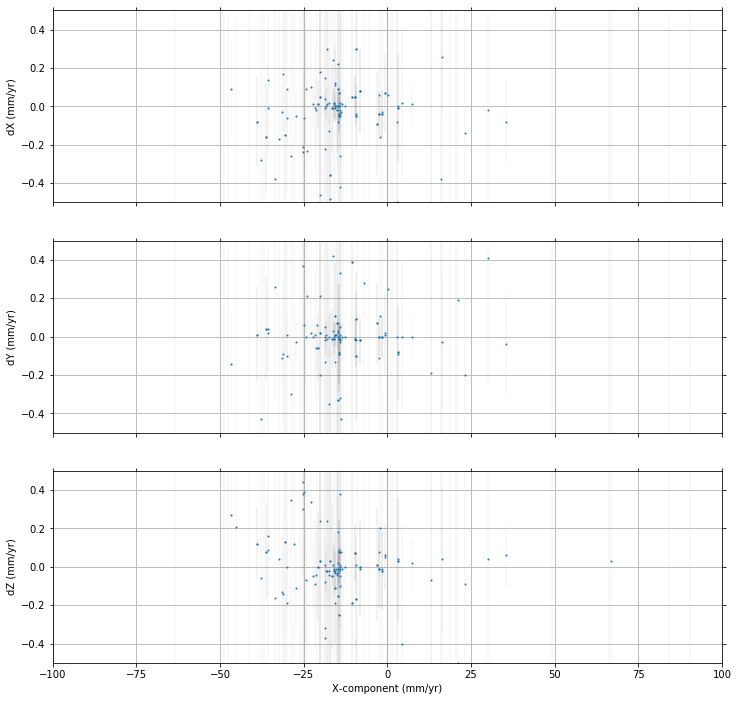

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["xv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["xv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["xv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("X-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

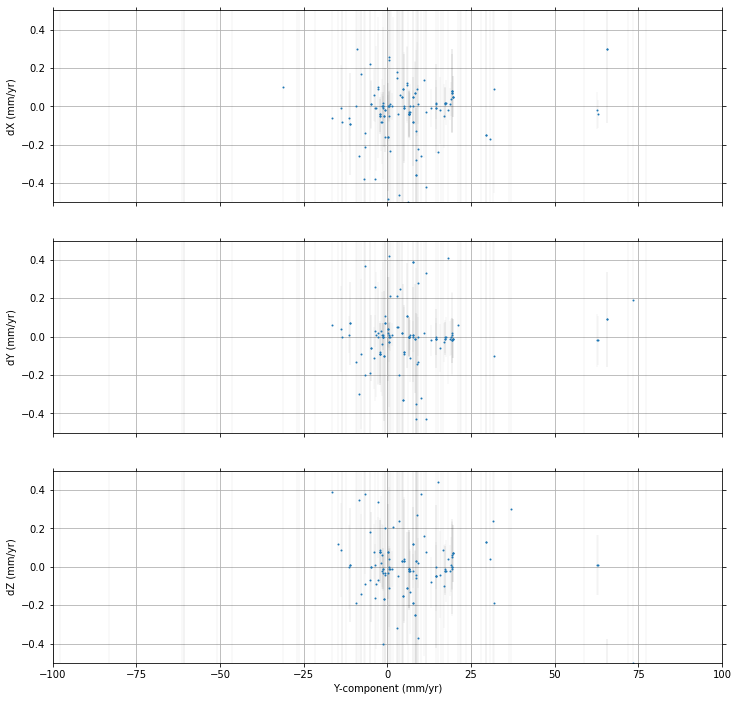

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["yv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["yv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["yv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Y-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

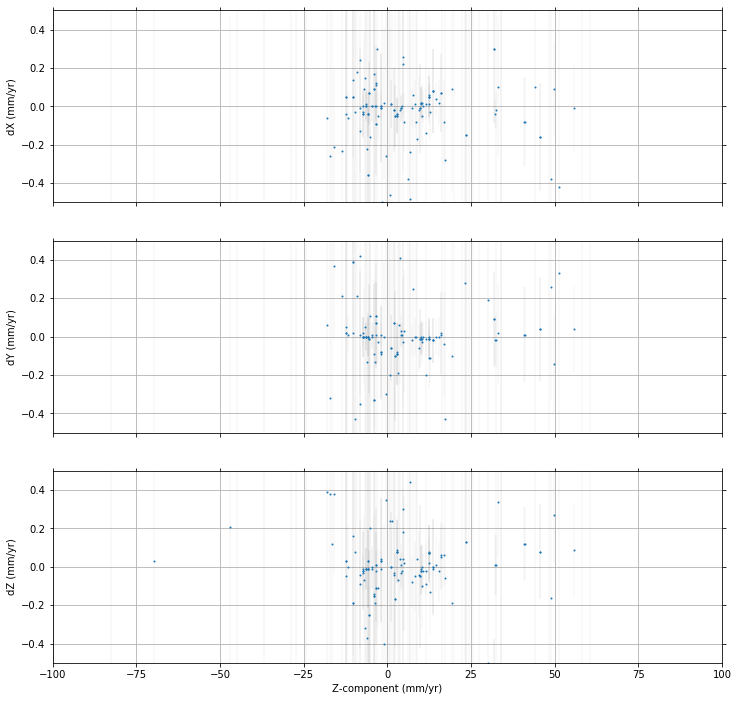

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)

ax0.errorbar(trfoft["zv"], trfoft["dxv"], fmt=".", ms=2,
             yerr=trfoft["dxv_err"], elinewidth=0.05, ecolor="k")
ax1.errorbar(trfoft["zv"], trfoft["dyv"], fmt=".", ms=2,
             yerr=trfoft["dyv_err"], elinewidth=0.05, ecolor="k")
ax2.errorbar(trfoft["zv"], trfoft["dzv"], fmt=".", ms=2,
             yerr=trfoft["dzv_err"], elinewidth=0.05, ecolor="k")

ax2.set_xlabel("Z-component (mm/yr)")

ax0.set_ylabel("dX (mm/yr)")
ax1.set_ylabel("dY (mm/yr)")
ax2.set_ylabel("dZ (mm/yr)")

ax0.set_xlim([-100, 100])
ax0.set_ylim([-0.5, 0.5])
ax1.set_ylim([-0.5, 0.5])
ax2.set_ylim([-0.5, 0.5])

ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

plt.subplots_adjust()

In [21]:
dxv = np.array(trfoft["dxv"])
dyv = np.array(trfoft["dyv"])
dzv = np.array(trfoft["dzv"])
dxv_err = np.array(trfoft["dxv_err"])
dyv_err = np.array(trfoft["dyv_err"])
dzv_err = np.array(trfoft["dzv_err"])
xy_cov = np.array(trfoft["dxv_dyv_cov"])
xz_cov = np.array(trfoft["dxv_dzv_cov"])
yz_cov = np.array(trfoft["dyv_dzv_cov"])

helmert_trans(dxv, dyv, dzv, dxv_err, dyv_err, dzv_err,
              xy_cov, xz_cov, yz_cov, xp, yp, zp, data_type="v")

#### Translation component (mm/yr):
    -0.006 +/-    0.015 |   +0.006 +/-    0.022 |   -0.015 +/-    0.018 | =>    0.017 +/-    0.000
#### Scale factor (ppb/yr）:
    0.000 +/-   0.002
#### Rotation component（mas/yr）:
     +0.000 +/-    0.001 |    +0.000 +/-    0.001 |    -0.000 +/-    0.001 | =>   +0.000 +/-    0.000
##   correlation coefficients are:
 [[ 1.         -0.02857183 -0.01832206  0.00199281  0.02639578  0.00248225
   0.63737174]
 [-0.02857183  1.          0.35386158  0.01264163  0.86314988  0.02967083
   0.00654261]
 [-0.01832206  0.35386158  1.         -0.08820115  0.44789975  0.05429159
  -0.02224912]
 [ 0.00199281  0.01264163 -0.08820115  1.          0.00978531 -0.0015727
   0.00285193]
 [ 0.02639578  0.86314988  0.44789975  0.00978531  1.         -0.01021809
   0.03338525]
 [ 0.00248225  0.02967083  0.05429159 -0.0015727  -0.01021809  1.
  -0.28051404]
 [ 0.63737174  0.00654261 -0.02224912  0.00285193  0.03338525 -0.28051404
   1.        ]]
